In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/car_insurance.csv')
data.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


### 1. Descriptive Analysis

#### 1. Distribution of Age and Driving *Experience*

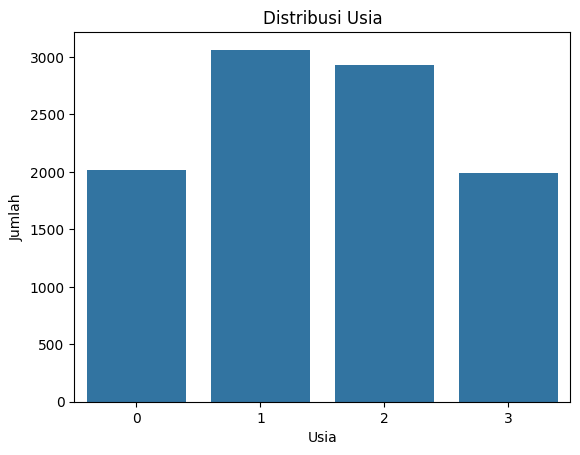

In [ ]:
# Plot distribusi usia
sns.countplot(data=data, x='age')
plt.title('Distribusi Usia')
plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.show()

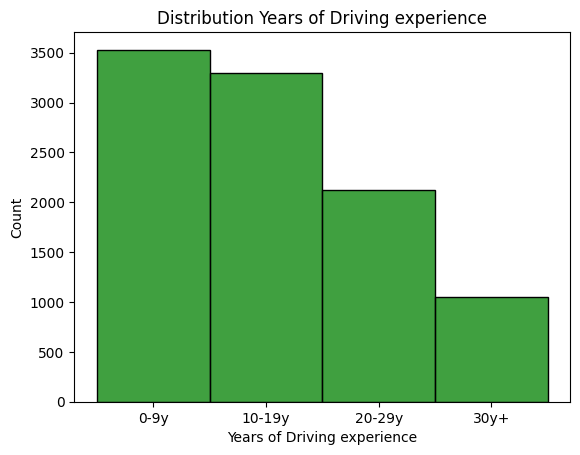

In [ ]:
# Plot for Distribution Years of Driving experience
sns.histplot(data['driving_experience'], color='green')
plt.title('Distribution Years of Driving experience')
plt.xlabel('Years of Driving experience')
plt.ylabel('Count')
plt.show()

#### 2. Correlation between Education and Income Level

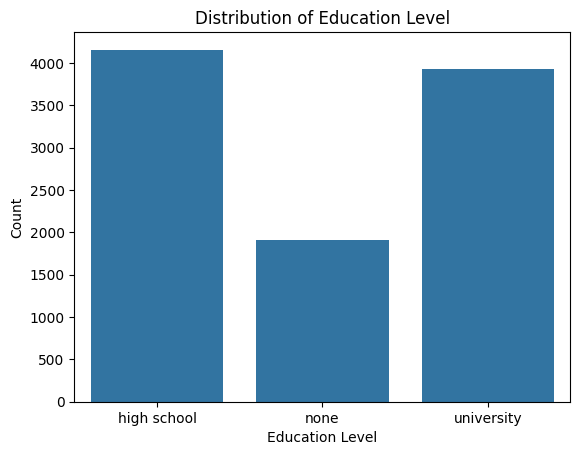

In [ ]:
# Distribution of Education Level
sns.countplot(data=data, x='education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Distribution of Education Level')
plt.show()

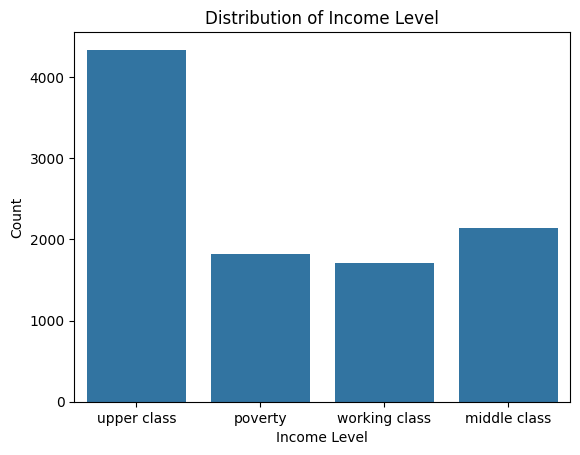

In [ ]:
# Distribution of Income Level
sns.countplot(data=data, x='income')
plt.xlabel('Income Level')
plt.ylabel('Count')
plt.title('Distribution of Income Level')
plt.show()

In [ ]:
# Correlation of Education and Income Level
pd.crosstab(data['education'], data['income'], normalize='index') * 100

income,middle class,poverty,upper class,working class
education,,,,
high school,26.750060,17.656964,34.351696,21.241280
none,14.934726,51.331593,7.415144,26.318538
university,18.839104,2.469450,70.417515,8.273931


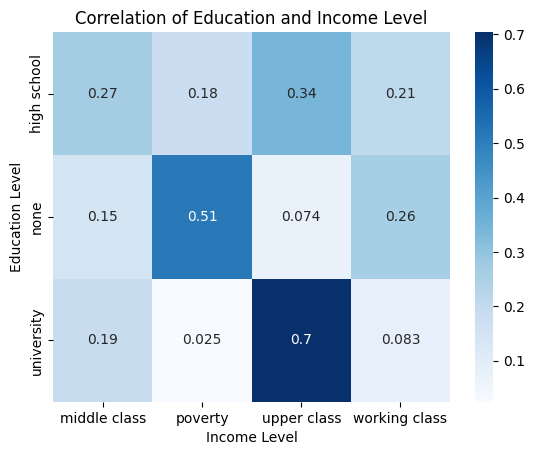

In [ ]:
crosstab_data = pd.crosstab(data['education'], data['income'], normalize='index')

sns.heatmap(crosstab_data, annot=True, cmap='Blues')
plt.xlabel('Income Level')
plt.ylabel('Education Level')
plt.title('Correlation of Education and Income Level')
plt.show()

#### 3. Distribution Credit Score and Vehicle Ownership

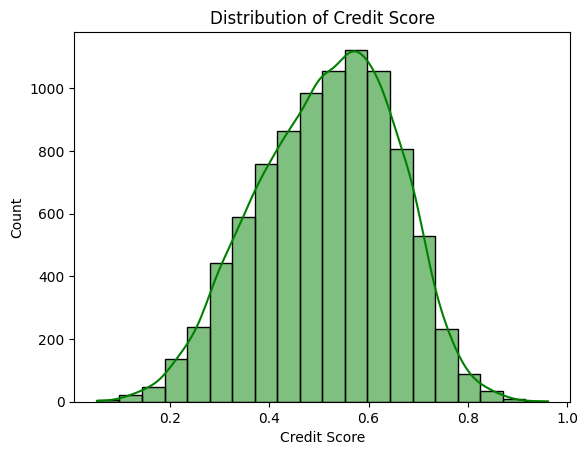

In [ ]:
# Distribution of Credit Score
sns.histplot(data['credit_score'], bins=20, kde=True, color='green')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

<ipython-input-12-192b93aa920d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='vehicle_ownership', palette='Set2')


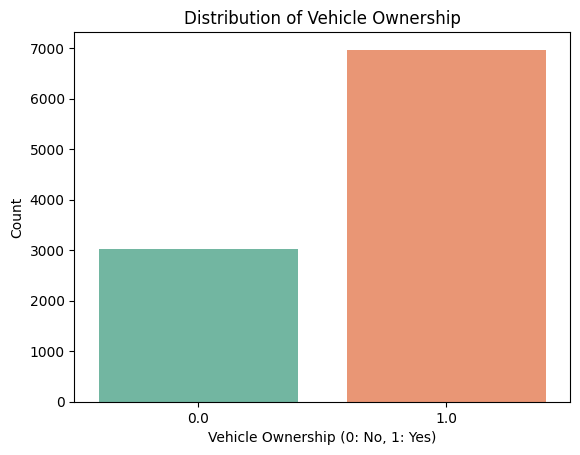

In [ ]:
# Distribution of Vehicle Ownership
sns.countplot(data=data, x='vehicle_ownership', palette='Set2')
plt.title('Distribution of Vehicle Ownership')
plt.xlabel('Vehicle Ownership (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

<ipython-input-13-f8e374e82f3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vehicle_ownership', y='credit_score', data=data, palette='Set3')


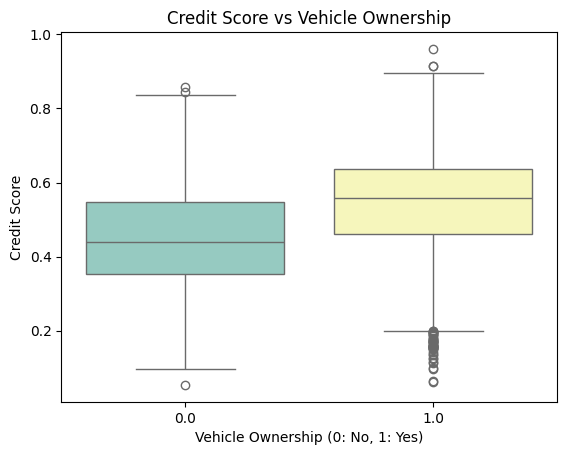

In [ ]:
# Boxplot for correlation between Credit Score and Vehicle Ownership
sns.boxplot(x='vehicle_ownership', y='credit_score', data=data, palette='Set3')
plt.title('Credit Score vs Vehicle Ownership')
plt.xlabel('Vehicle Ownership (0: No, 1: Yes)')
plt.ylabel('Credit Score')
plt.show()

#### 4. Correlation between Vehicle Type and Annual mileage

<ipython-input-14-ca71be9627f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='vehicle_type', palette='Set1')


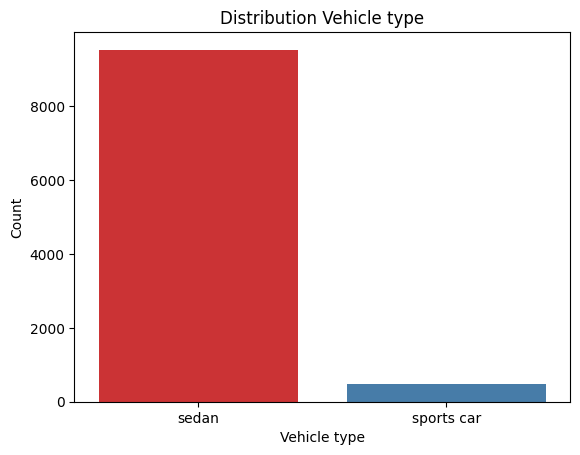

In [ ]:
# Distribution of Vehicle Type
sns.countplot(data=data, x='vehicle_type', palette='Set1')
plt.title('Distribution Vehicle type')
plt.xlabel('Vehicle type')
plt.ylabel('Count')
plt.show()

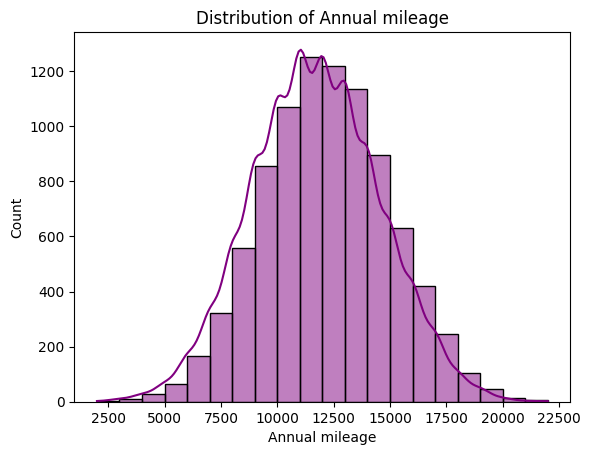

In [ ]:
# Distribution of Annual mileage
sns.histplot(data['annual_mileage'], bins=20, kde=True, color='purple')
plt.title('Distribution of Annual mileage')
plt.xlabel('Annual mileage')
plt.ylabel('Count')
plt.show()

<ipython-input-16-860dc0c606b7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='vehicle_type', y='annual_mileage', data=data, palette='Set2')


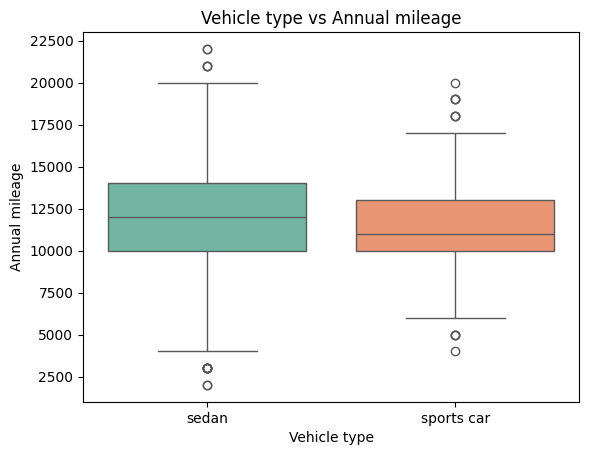

In [ ]:
# Boxplot for Correlation Vehicle type and annual mileage
sns.boxplot(x='vehicle_type', y='annual_mileage', data=data, palette='Set2')
plt.title('Vehicle type vs Annual mileage')
plt.xlabel('Vehicle type')
plt.ylabel('Annual mileage')
plt.show()

### 2. Correlation Analysis

#### 1. Correlation between Risk Factors and Insurance Claims

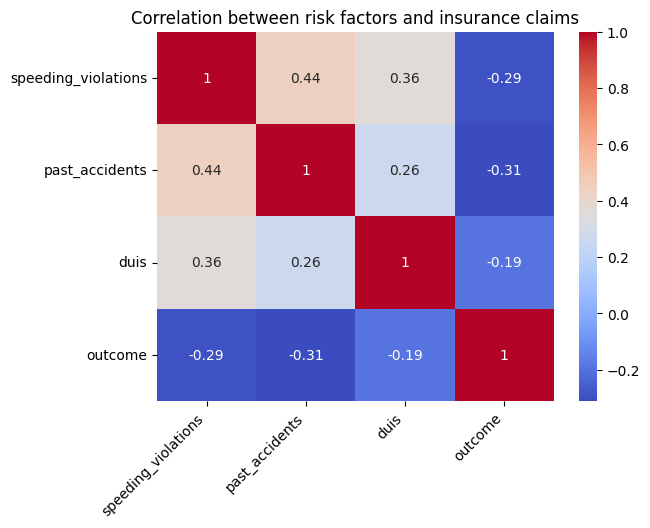

In [ ]:
# Select relevant columns
risk_factors = ['speeding_violations', 'past_accidents', 'duis', 'outcome']

# Calculate the correlation between risk factors and insurance claims
correlation_matrix = data[risk_factors].corr()

# Correlation visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between risk factors and insurance claims')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 2. Distribution of Claims Based on Risk Factors

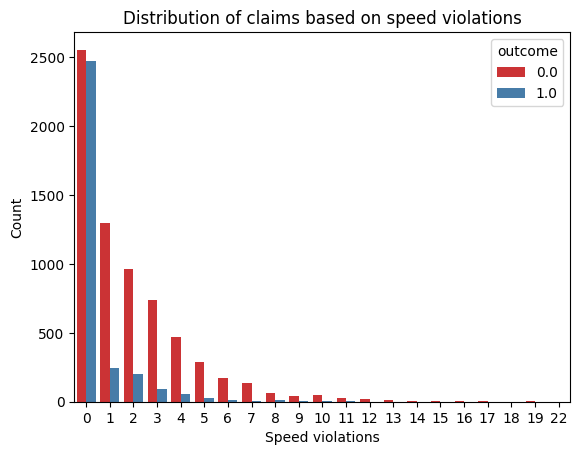

In [ ]:
# Distribution of claims based on speed violations
sns.countplot(x='speeding_violations', hue='outcome', data=data, palette='Set1')
plt.xlabel('Speed violations')
plt.ylabel('Count')
plt.title('Distribution of claims based on speed violations')
plt.show()

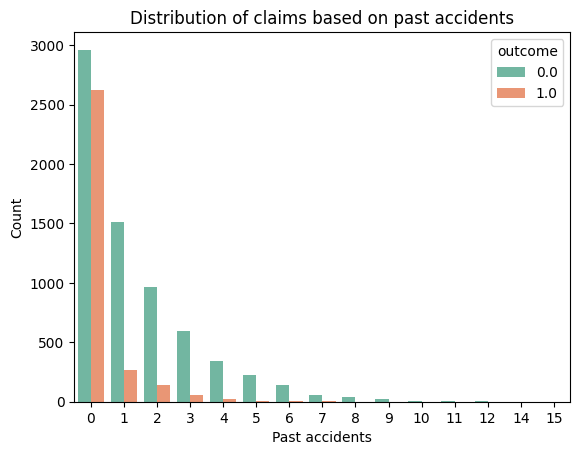

In [ ]:
# Distribution of claims based on past accidents
sns.countplot(x='past_accidents', hue='outcome', data=data, palette='Set2')
plt.title('Distribution of claims based on past accidents')
plt.xlabel('Past accidents')
plt.ylabel('Count')
plt.show()

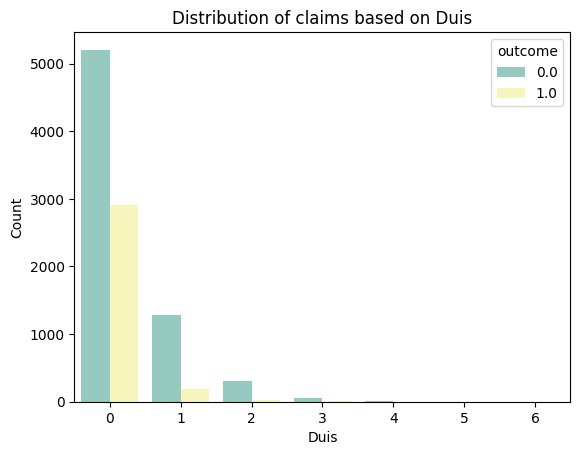

In [ ]:
# Distribution of claims based on Duis
sns.countplot(x='duis', hue='outcome', data=data, palette='Set3')
plt.xlabel('Duis')
plt.ylabel('Count')
plt.title('Distribution of claims based on Duis')
plt.show()

### 3.Customer Segmentation Based on Risk Categories

<ipython-input-26-ac96f99f2563>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='risk_category', data=data, palette='coolwarm')


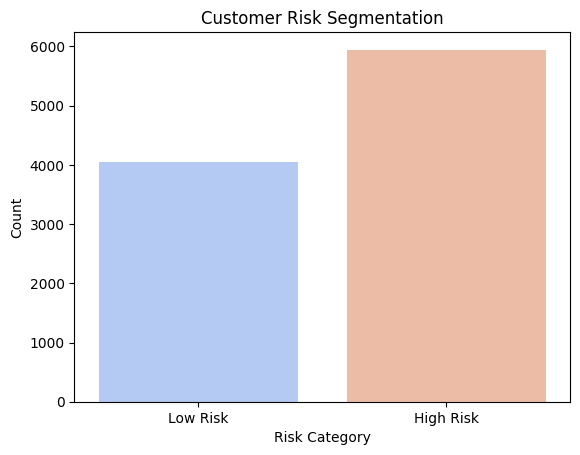

In [ ]:
# Create simple risk segmentation based on the number of violations, accidents, and DUIs
data['risk_category'] = 'Low Risk'
data.loc[(data['speeding_violations'] > 0) | (data['past_accidents'] > 0) | (data['duis'] > 0), 'risk_category'] = 'High Risk'

# Distribution of risk segmentation
sns.countplot(x='risk_category', data=data, palette='coolwarm')
plt.title('Customer Risk Segmentation')
plt.xlabel('Risk Category')
plt.ylabel('Count')
plt.show()

### 4. Insurance Claim Analysis



#### 1.Calculating the Proportion of Customers Submitting Claims

In [ ]:
# Calculating the Proportion of Customers Submitting Claims
claim_proportion = data['outcome'].value_counts(normalize=True) * 100
print(claim_proportion)

outcome
0.0    68.67
1.0    31.33
Name: proportion, dtype: float64


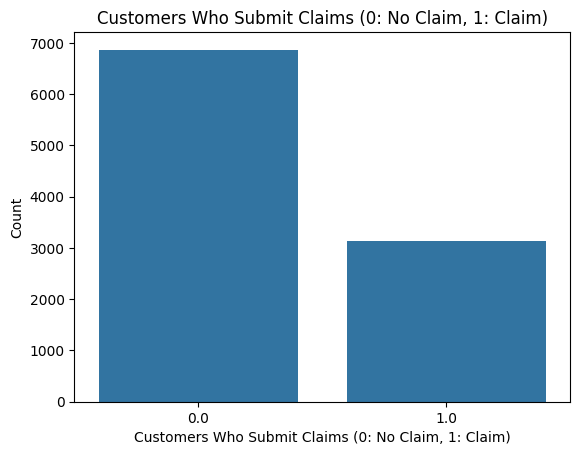

In [ ]:
# Plot for Customers Who Submit Claims (0: No Claim, 1: Claim)
sns.countplot(data=data, x='outcome')
plt.title('Customers Who Submit Claims (0: No Claim, 1: Claim)')
plt.xlabel('Customers Who Submit Claims (0: No Claim, 1: Claim)')
plt.ylabel('Count')
plt.show()

#### 2. Analysis of the Characteristics of Customers Who Submit Claims

<ipython-input-27-5c960861a713>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='annual_mileage', data=data, palette='Set3')


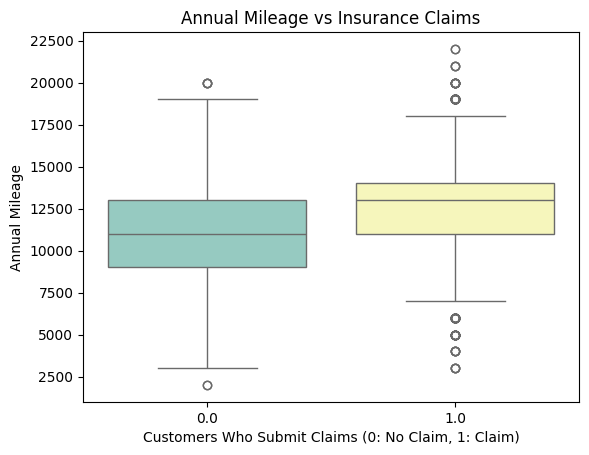

In [ ]:
# Boxplot for Correlation Annual Mileage and Insurance Claims
sns.boxplot(x='outcome', y='annual_mileage', data=data, palette='Set3')
plt.title('Annual Mileage vs Insurance Claims')
plt.xlabel('Customers Who Submit Claims (0: No Claim, 1: Claim)')
plt.ylabel('Annual Mileage')
plt.show()

<ipython-input-29-d5bdc49af25b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='vehicle_year', data=data, palette='Set2')


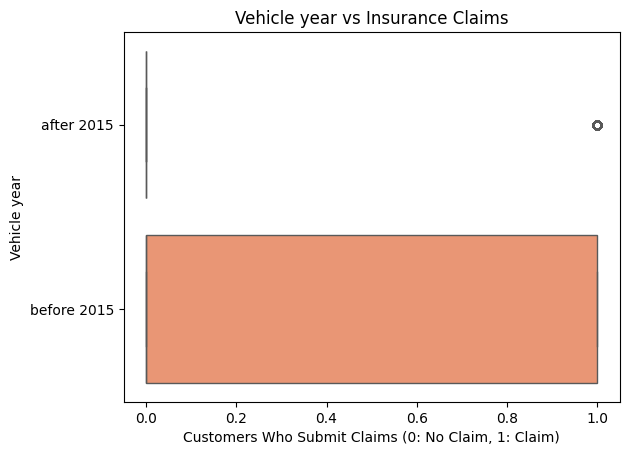

In [ ]:
# Boxplot for Correlation Vehicle year and Insurance Claims
sns.boxplot(x='outcome', y='vehicle_year', data=data, palette='Set2')
plt.title('Vehicle year vs Insurance Claims')
plt.xlabel('Customers Who Submit Claims (0: No Claim, 1: Claim)')
plt.ylabel('Vehicle year')
plt.show()